<div style="text-align: center; font-size: 25px;">
    <span>
        <strong>[010412204101] - Khai thác dữ liệu</strong>
    </span><br>
    <span>
        <strong>Nguyễn Quốc Huy - 22H1120071 - CN22CLCC</strong>
    </span><br>
    <p>
        <strong>Bài tập 2.2</strong>
    </p>
</div>


<p style="font-size: 20px;">
        <strong>1. Nạp dự liệu iris vào bộ nhớ và hiển thị thông tin về số thuộc tính (dimensionality), số objects (size).</strong>

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# Nạp dữ liệu Iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Hiển thị thông tin 
print(f"Dimensionality (số thuộc tính): {iris.data.shape[1]}")
print(f"Size (số objects): {df.shape[0]}")
print(df.head(3)) 


Dimensionality (số thuộc tính): 4
Size (số objects): 150
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   

   target  
0       0  
1       0  
2       0  


<p style="font-size: 20px;">
        <strong>2. Đặt nhãn (label) cho dữ liệu đã nạp và hiển thị số lớp (classes)</strong>

In [2]:
# Lấy nhãn và tên thuộc tính
labels = iris.target_names
feature_names = iris.feature_names

# Hiển thị thông tin
print('Number of Classes: {}'.format(len(labels)))  # Số lớp
print('Classes (Labels):', labels)                 # Tên các lớp
print('Number of Features: {}'.format(len(feature_names)))  # Số thuộc tính
print('Feature Names:', feature_names)             # Tên các thuộc tính


Number of Classes: 3
Classes (Labels): ['setosa' 'versicolor' 'virginica']
Number of Features: 4
Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


<p style="font-size: 20px;">
        <strong>3. Tách dữ liệu thành hai phần: training data(70%) và test data (30%)</strong>

In [3]:
from sklearn.model_selection import train_test_split

# Tách dữ liệu thành features (X) và labels (Y)
X = df[iris.feature_names]
Y = df['target']

# Chia dữ liệu thành training data (70%) và test data (30%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, train_size=0.7, test_size=0.3)

# Hiển thị kích thước của các tập dữ liệu
print("Training data (X_train, Y_train):", X_train.shape, Y_train.shape)
print("Test data (X_test, Y_test):", X_test.shape, Y_test.shape)

# Hiển thị
print("\nX_train (first 3 rows):")
print(X_train.head(3))

print("\nX_test (first 3 rows):")
print(X_test.head(3))


Training data (X_train, Y_train): (105, 4) (105,)
Test data (X_test, Y_test): (45, 4) (45,)

X_train (first 3 rows):
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
60                 5.0               2.0                3.5               1.0
116                6.5               3.0                5.5               1.8
144                6.7               3.3                5.7               2.5

X_test (first 3 rows):
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
114                5.8               2.8                5.1               2.4
62                 6.0               2.2                4.0               1.0
33                 5.5               4.2                1.4               0.2


<p style="font-size: 20px;">
        <strong>4. Chuẩn hóa dữ liệu với StandardScaler</strong>

In [4]:
from sklearn.preprocessing import StandardScaler

# Chuẩn hóa dữ liệu với StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)       

# Hiển thị 
print("X_train (first 3 rows after scaling):")
print(X_train[0:3, :])

print("\nX_test (first 3 rows after scaling):")
print(X_test[0:3, :])

X_train (first 3 rows after scaling):
[[-1.02366372 -2.37846268 -0.18295039 -0.29318114]
 [ 0.69517462 -0.10190314  0.93066067  0.7372463 ]
 [ 0.92435306  0.58106472  1.04202177  1.63887031]]

X_test (first 3 rows after scaling):
[[-0.10694994 -0.55721505  0.70793846  1.51006688]
 [ 0.1222285  -1.92315077  0.09545238 -0.29318114]
 [-0.45071761  2.6299683  -1.35224199 -1.32360858]]


<p style="font-size: 20px;">
        <strong>5. Tạo và huấn luyện mô hình với training data</strong>

In [5]:
from sklearn.tree import DecisionTreeClassifier

# Tạo mô hình DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2, random_state=0)

# Huấn luyện mô hình với training data
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

<p style="font-size: 20px;">
        <strong>6. Test và đánh giá độ chính xác của mô mình, yêu cầu hiển thị ma trận confusion matrix, accuracy, f-score</strong>

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

# Kiểm thử mô hình với 10 dữ liệu đầu tiên
print('Input: \n', X_test[0:9])
print('Predicted Output: ', clf.predict(X_test[0:9]))
print('True Value: ', Y_test.values[0:9])

# Đánh giá mô hình
# - Ma trận confusion
Y_predict = clf.predict(X_test)
Y_true = Y_test.values
print("\nConfusion Matrix:")
print(confusion_matrix(Y_true, Y_predict))

# - Accuracy và F1-score
accuracy = accuracy_score(Y_true, Y_predict)
f1 = f1_score(Y_true, Y_predict, average=None)
print("\nAccuracy: ", accuracy)
print("F1-score (per class): ", f1)

Input: 
 [[-0.10694994 -0.55721505  0.70793846  1.51006688]
 [ 0.1222285  -1.92315077  0.09545238 -0.29318114]
 [-0.45071761  2.6299683  -1.35224199 -1.32360858]
 [ 1.6118884  -0.32955909  1.37610509  0.7372463 ]
 [-1.02366372  0.80872067 -1.29656144 -1.32360858]
 [ 0.46599617  0.58106472  1.20906343  1.63887031]
 [-1.02366372  1.03637663 -1.40792255 -1.19480515]
 [ 0.92435306  0.12575281  0.48521625  0.35083601]
 [ 1.03894229 -0.55721505  0.5408968   0.22203258]]
Predicted Output:  [2 1 0 2 0 2 0 1 1]
True Value:  [2 1 0 2 0 2 0 1 1]

Confusion Matrix:
[[16  0  0]
 [ 0 17  1]
 [ 0  3  8]]

Accuracy:  0.9111111111111111
F1-score (per class):  [1.         0.89473684 0.8       ]


<p style="font-size: 20px;">
        <strong>7. Trực quan hóa cây quyết định</strong>


Decision Tree Rules:

|--- petal width (cm) <= -0.62
|   |--- class: 0
|--- petal width (cm) >  -0.62
|   |--- petal length (cm) <= 0.62
|   |   |--- class: 1
|   |--- petal length (cm) >  0.62
|   |   |--- class: 2



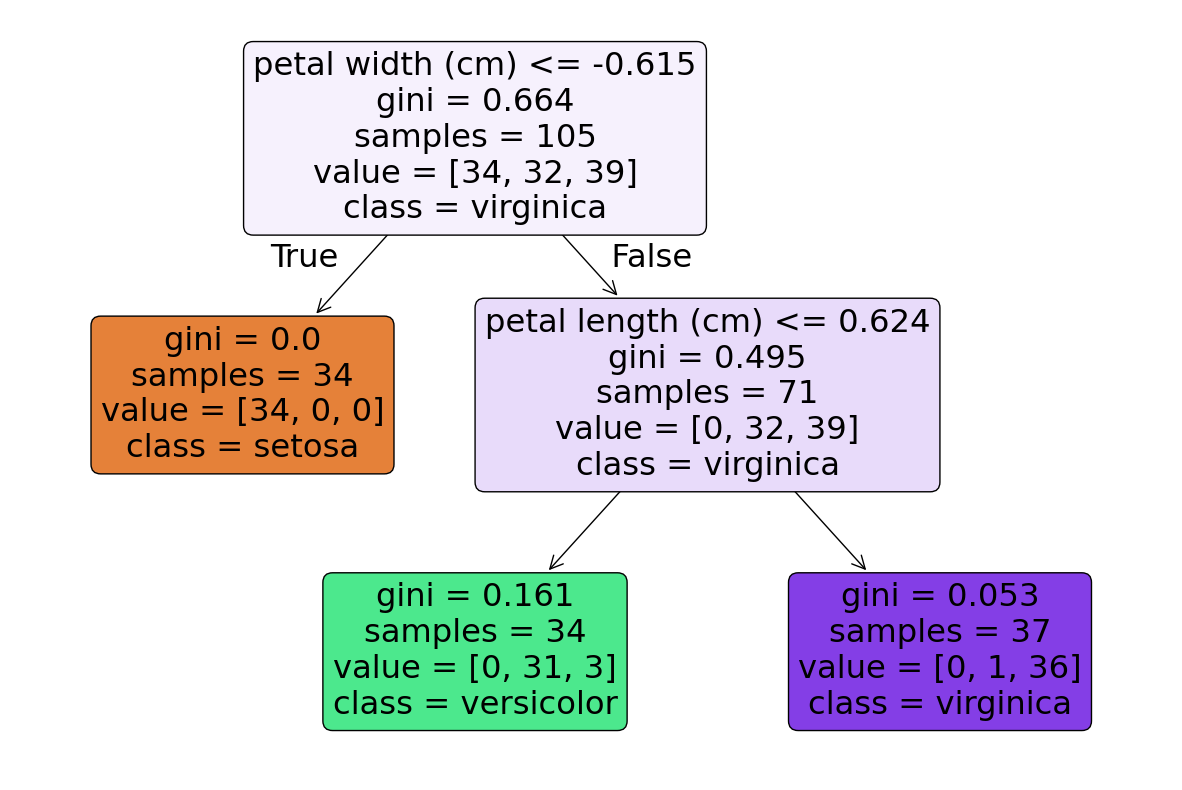

In [8]:
import sklearn
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn import tree
import matplotlib.pyplot as plt
if sklearn.__version__ < '0.20.0':
    raise Exception('Error: required sklearn version >=0.20')
feature_names = iris.feature_names 
class_names = iris.target_names 

print("\nDecision Tree Rules:\n")
print(export_text(clf, feature_names=list(iris.feature_names)))

plt.figure(figsize=(15,10))
tree.plot_tree(clf,
               feature_names=feature_names,
               class_names=class_names,
               filled=True, 
               rounded=True) 
plt.show()
